In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Basit Doğrusal Regresyon : Birbirine bağımlı veya bağımsız 2 değişken arasında ki ilişliyi inceler.
Örneğin evin metrekare fiyatı arttıkça ev fiyatıartışı oluyor mu. Doğrusal regresyonlar değişkenler arasında pozitif veya negatif yönlü bir ilişki varsa yapılır. Korelasyon katsayısı 0 olmayacak.

Biz Doğrusal regresyon hesaplarken bize ei yani artık değer ihtiyacımız vardır. ei = gerçek_değer-tahmni_edilen_değer.
yi = b1+bo*xi
yani : yi bizim tahinde bulunacağımız bağımlı değişkendir. b0 bizim intercept sabit değerimizdir. b1 bizim coef kat sayı değerimizdir. xi ise bizim tahmin için vereceğimiz değerdir.

Bizim burda yapacağımız işlem şudur. 

yi = b1+b0*xi
gerçek_yi - yi = hata_farkı
hata_kareler = (hata_farkı)**2
hata_kareler_ortalamasını hesaplayıp yaptığımız hatanın ortalamasını buluruz.

In [2]:
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Basit doğrusal regresyon inceleyeceğimiz için tek değişken üzerinden işlemlerimizi yapacağız. 
df.info()
# 4 tane değişken ve 200 tane değeri olan bir dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# ilk önce TV ile sales arasında ki ilişkiyi inceleyelim.
import seaborn as sns

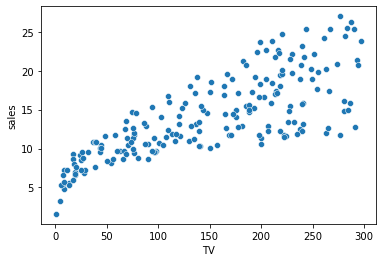

In [6]:
sns.scatterplot(x=df["TV"],y=df["sales"] );
# görüldüğü üzere TV reklam harcamaları arttıkça satışlar da artmış.
# burda 2 tane değişkenimiz var. TV bağımsız değişkendir. Çünkü TV harcamalrı üzerinden tahminde bulunacağız. 
# sales te bağımlı değişkendir. Çünkü işlem sonunda değişiklik olup olmadığına oraya bakacağız.

In [8]:
x = df[["TV"]]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [9]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [10]:
from sklearn.linear_model import LinearRegression
# sebebi basit doğrusal regresyon Linear demektir. Onun için Linearı import ettik.

In [11]:
lnr = LinearRegression()

In [13]:
model = lnr.fit(x,y)
# x ve y değişkenlerini fit ediyoruz. yani artık x ve y değişkenini model ediyoruz.
# fit fonlsiyonunn b0 sabiti ve b1 katsayısını bulmak için yapıyoruz.

In [15]:
model.coef_
# b1 kat sayımızdır. 

array([[0.04753664]])

In [16]:
model.intercept_
# b0 sabit sayımız.

array([7.03259355])

In [17]:
model.score(x,y)
# x değişkeni y değişkenini pozitif yönde %60 oranında etkilemektedir.

0.611875050850071

In [18]:
df["TV"].corr(df["sales"])
# araların da güçlü pozitif yönlü korelasyon ilişkisi vardır.

0.7822244248616064

yi burda sales tır.  b0 = 7.03259355 ve b1 = 0.04753664 değerlerimizdir.
örneğin bize 160 birimlilk bir TV harcaması yapılınca Sales değerini bulun dediler.

yi = 7.03259355+ 0.04753664*160
yi = 14.638455949999999 olur. 14.5 birimlik bir satış olur.

In [23]:
model.predict([[160]])
# predict ile tahminde bulunuldu.

array([[14.63845602]])

In [25]:
model.predict([[5],[20],[40]])
# 5 birim, 20 birim ve 40 birim TV harcaması için bize tahminde bulundu.

array([[7.27027675],
       [7.98332636],
       [8.93405917]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


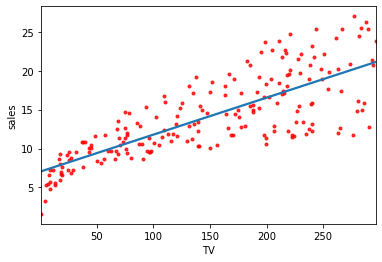

In [20]:
sns.regplot(df["TV"],df["sales"], ci=True, scatter_kws={"color":"r","s":9});

In [ ]:
# artıklar yani hata ölçüm değerleri : 

In [26]:
tahmin_y = model.predict(x)

In [27]:
tahmin_y[0:10]
# ilk 10 satış rakamlarını tahmin etti.
# bunu dataframeye çevirip bir dataframe üzerinden gerçek satış değerleri ile kıyaslama yapalım.

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [28]:
tahmin_y = pd.DataFrame(tahmin_y)

In [29]:
y.head()
# bu da gerçek satış fiyatlarımız.

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [30]:
y = pd.concat([y,tahmin_y],axis=1)

In [32]:
y.columns = ["gerçek","tahmin"]
y.head()

,gerçek,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


In [33]:
y["hata_fark"] = y["gerçek"] - y["tahmin"]
y["hata_kare"] = y["hata_fark"]**2

In [34]:
y.head()

,gerçek,tahmin,hata_fark,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719


In [35]:
y["hata_kare"].mean()
# yaptığımız tahminin hata ortalamasını bulduk.

10.512652915656757

In [36]:
# Konu ile ilgili bir Örnek daha yapalım : 

In [37]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# bu sefer basit_regresyon yani LinearRegresyon ile sayı arttıkça total artıyor mu ona bakalım.

In [45]:
x = df[["size"]]
y = df[["total_bill"]]
# bunları dataframe şklinde yapmamız lazım yoksa fit etmez.

In [46]:
x.head()

,size
0,2
1,3
2,3
3,2
4,4


In [40]:
# x bağımsız değişken y bağımlı değişken dir. 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lnr = LinearRegression()

In [47]:
model = lnr.fit(x,y)
# 2 değişkeni modelledik.

In [48]:
# b0 sabiti için : 
model.intercept_

array([5.39499823])

In [49]:
# b1 katsayısı için :
model.coef_

array([[5.60030372]])

In [52]:
model.score(x,y)
# araların da % 35 lik bir ilişki var.

0.3579809958697491

In [53]:
model.predict([[5]])
# 5 kişi gelse 33 dolarlık bir hesap öder.

array([[33.39651683]])

In [54]:
tahmin_y = model.predict(x)

In [55]:
tahmin_y = pd.DataFrame(tahmin_y)

In [56]:
y = pd.concat([y,tahmin_y], axis =1)
y.columns = ["gerçek","tahmin"]

In [57]:
y.head()

,gerçek,tahmin
0,16.99,16.595606
1,10.34,22.195909
2,21.01,22.195909
3,23.68,16.595606
4,24.59,27.796213


In [59]:
y["fark"] = y["gerçek"]-y["tahmin"]
y.head()

,gerçek,tahmin,fark
0,16.99,16.595606,0.394394
1,10.34,22.195909,-11.855909
2,21.01,22.195909,-1.185909
3,23.68,16.595606,7.084394
4,24.59,27.796213,-3.206213


In [60]:
y["hata_kare"] = y["fark"]**2
y["hata_kare"].mean()

50.673360376115426

In [61]:
df["size"].corr(df["total_bill"])

0.5983151309049012

In [ ]:
# bir de total_bill ile tips arasında ki ilişkiye bakalım.

In [68]:
x = df[["total_bill"]]
y = df[["tip"]]

In [66]:
# x bağımsız y bağımlı yani hesap ile bahşiş arasında ki ilişkiyi tahmin ettireceğiz.  

In [ ]:
from sklearn.linear_model import LinearRegression

In [67]:
lnr = LinearRegression()

In [69]:
model = lnr.fit(x,y)

In [70]:
tahmin_y = model.predict(x)

In [71]:
tahmin_y = pd.DataFrame(tahmin_y)

In [72]:
y = pd.concat([y,tahmin_y], axis=1)
y.columns=["gerçek","tahmin"]
y["fark"] = y["gerçek"]-y["tahmin"]
y.head()

,gerçek,tahmin,fark
0,1.01,2.704636,-1.694636
1,1.66,2.006223,-0.346223
2,3.50,3.126835,0.373165
3,3.31,3.407250,-0.097250
4,3.61,3.502822,0.107178


In [73]:
y["kare"] = y["tahmin"]**2
y["kare"].mean()

9.860264164545999

In [74]:
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
# newspaper gazete harcamalarına göre tahminde bulunalım.

In [85]:
x = df[["newspaper"]]
y = df[["sales"]]

In [ ]:
from sklearn.linear_model import LinearRegression

In [82]:
lnr = LinearRegression()

In [87]:
model = lnr.fit(x,y)

In [88]:
model.coef_
# b1 katsayımız.

array([[0.0546931]])

In [89]:
model.intercept_
# bo sabitimiz

array([12.35140707])

In [90]:
model.score(x,y)

0.05212044544430516

In [91]:
y_tahmin = model.predict(x)
y_tahmin = pd.DataFrame(y_tahmin)
y = pd.concat([y,y_tahmin], axis=1)
y.columns = ["gerçek","tahmin"]
y["fark"] = y["gerçek"]-y["tahmin"]
y.head()

,gerçek,tahmin,fark
0,22.1,16.136169,5.963831
1,10.4,14.818066,-4.418066
2,9.3,16.141639,-6.841639
3,18.5,15.550953,2.949047
4,12.9,15.545484,-2.645484


In [92]:
np.mean(y["fark"]**2)

25.6740227205597